In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset=pd.read_csv('Mall_Customers.csv')
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
x=dataset.iloc[:, [3,4]].values

In [4]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score
from sklearn.preprocessing import StandardScaler

In [5]:
# Generate synthetic data
x, true_labels = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)

In [6]:
# Standardize the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(x)

In [11]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
cluster_labels = kmeans.fit_predict(data_scaled)

In [12]:
# Evaluate clustering performance
silhouette = silhouette_score(data_scaled, cluster_labels)
ari = adjusted_rand_score(true_labels, cluster_labels)
nmi = normalized_mutual_info_score(true_labels, cluster_labels)

In [13]:
# Print evaluation metrics
print(f"Silhouette Score: {silhouette}")
print(f"Adjusted Rand Index: {ari}")
print(f"Normalized Mutual Information: {nmi}")

Silhouette Score: 0.6735935695194378
Adjusted Rand Index: 0.9055399173179081
Normalized Mutual Information: 0.9303337890229783


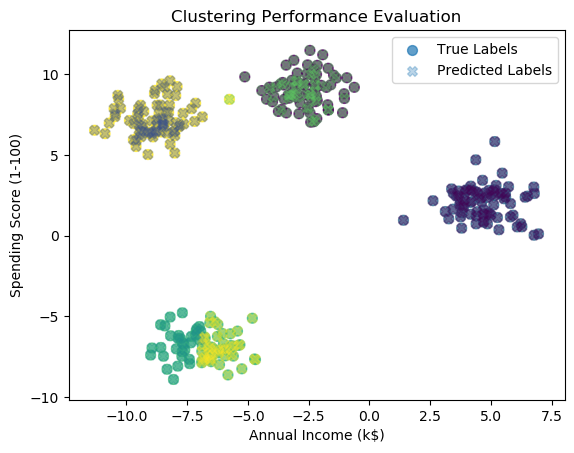

In [14]:
# Plot the data points with true and predicted labels
plt.scatter(x[:, 0], x[:, 1], c=true_labels, cmap='viridis', s=50, alpha=0.7, label='True Labels')
plt.scatter(x[:, 0], x[:, 1], c=cluster_labels, cmap='viridis', s=50, alpha=0.3, marker='X', label='Predicted Labels')
plt.title('Clustering Performance Evaluation')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()